<a href="https://colab.research.google.com/github/rangnguyen/deeplearning/blob/master/hw2/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Fashion MNIST**

In this exercise, we will build a simple neural network to classify objects from Fashion MNIST dataset.

## **YOUR TASKS:**

1. Implementing PlotLosses class which is inherited from Callback class to plot the curves of training loss and validation loss during training

2. Adding Dropout layers to the current model and try with several different settings to choose the best model

3. Implementing EarlyStopping class (inherited from Callback) which will stop the training process if the accuracy of the validation set is larger than 90%

4. Save the best model so far to Google Drive






In [0]:
from __future__ import absolute_import, division, print_function
from tensorflow import keras
from keras import Sequential, initializers
from keras.layers import Flatten, Dense, Dropout
from keras.callbacks import Callback, ModelCheckpoint
from keras.optimizers import SGD

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

seed = 7

Load dataset

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


Normalize data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Show the first 25 examples

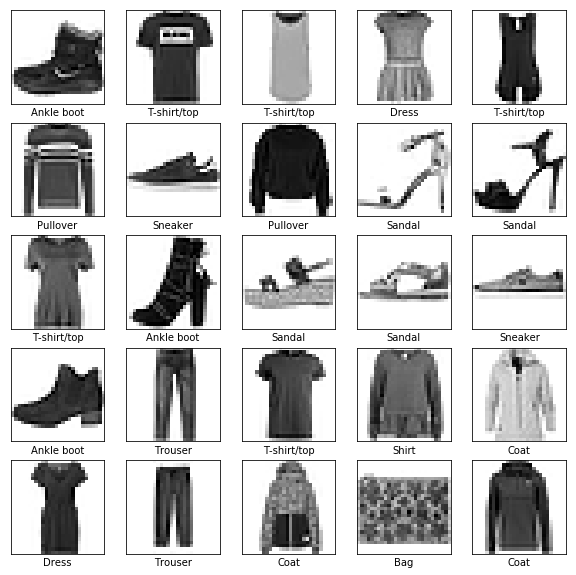

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Implementing PlotLosses class which is inherited from Callback class to plot the curves of training loss and validation loss during training

In [0]:
class PlotLosses(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        # for loss
        self.x = []
        self.losses = []
        self.val_losses = []        
        
        # for acc
        self.acc = []
        self.val_acc = []
        
        self.fig = plt.figure()
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        
        # accuracy
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.i += 1
        
        clear_output(wait=True)
        plt.subplot(211)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.subplot(212)
        plt.plot(self.x, self.acc, label="acc", color='r')
        plt.plot(self.x, self.val_acc, label="val_acc", color='g')
        plt.legend()
        plt.show();

        
plot_losses = PlotLosses()

 **YOUR TASK:**
Implementing EarlyStopping class (inherited from Callback) which will stop the training process if the accuracy of the validation set is larger than 90%

In [0]:
class EarlyStopping(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc')>=0.92):
      print("\nReached 90% accuracy on validation set so cancelling training!")
      self.model.stop_training = True

early_stopping = EarlyStopping()

Define a simple dense connected model

**YOUR TASK:** Adding Dropout layers to the current model and try with several different settings to choose the best model


In [0]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu', kernel_initializer=initializers.glorot_normal(seed)),
    Dropout(0.3),
    Dense(256, activation='relu', kernel_initializer=initializers.glorot_normal(seed)),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_initializer=initializers.glorot_normal(seed)),
    Dense(64, activation='relu', kernel_initializer=initializers.glorot_normal(seed)),
    Dense(32, activation='relu', kernel_initializer=initializers.glorot_normal(seed)),
    Dense(10, activation='softmax', kernel_initializer=initializers.glorot_normal(seed))
])
sgd = SGD(lr=0.015, momentum=0.9)
model.compile(optimizer=sgd,               
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train the above model and test

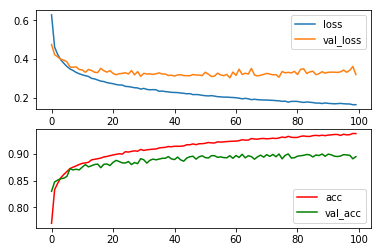

10000/10000 [==============================] - 0s 47us/step
Test accuracy: 0.8953


In [24]:
model.fit(train_images, train_labels, epochs=100,
          validation_data=(test_images, test_labels), 
          verbose=0, callbacks=[plot_losses, early_stopping])

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)